In [25]:
import numpy as np
import pandas as pd 


import seaborn as sns
import matplotlib.pyplot as plt


In [26]:
df=pd.read_csv("skincare_products.csv")
df.drop(columns='Platform',inplace=True)

In [27]:
# Check the shape of the dataset 
df.shape

(16901, 6)

In [28]:
df['Price']=df.Price.apply(lambda x:int(x[1:].replace(",","")))

In [29]:
# check for duplicates 
df.duplicated().sum()

3149

In [30]:
# Treat the duplicates 
df.drop_duplicates(inplace=True)

In [31]:
# Removing ml(weight unit) from packing  
import re
lst=[]
df['Packing']=df['Packing'].apply(lambda x:str(x))
for i in df.Packing:
  lst.append(pd.to_numeric(re.findall('\d+',i)).sum())
df['Packing']=lst

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
/var/folders/zv/mv8bvstd10b098sjffbflx5w0000gn/T/ipykernel_5334/288591474.py:6: SyntaxWarning: invalid escape sequence '\d'
  lst.append(pd.to_numeric(re.findall('\d+',i)).sum())


In [32]:
df

,Product,Price,Rating,Brand,Product Type,Packing
0,BIOTIQUE Fruit Brightening |Brightens & Soften...,212,4.2,BIOTIQUE,Face Wash,400
1,Mamaearth Rice With Rice Water & Niacinamide ...,339,4.3,Mamaearth,Face Wash,200
2,HIMALAYA PURIFYING NEEM | PREVENTS PIMPLE | AN...,239,4.4,HIMALAYA,Face Wash,400
3,The Derma Co Sali-Cinamide Anti-Acne with 2% S...,192,4.2,The,Face Wash,80
4,"MUUCHSTAC Ocean for Men, Anti Acne & Pimple, S...",349,4.1,MUUCHSTAC,Face Wash,300
...,...,...,...,...,...,...
16736,velvetbean Sunscreen - SPF NATURAL SPF 30 PA+ ...,250,4.2,velvetbean,Face Gel,100
16737,LOTUS HERBALS WhiteGlow Vitamin-C Radiance Fac...,416,4.2,LOTUS,Face Gel,200
16738,GREEN DERMA Alnalite-T Aloe Gel Tea tree Sooth...,114,4.0,GREEN,Face Gel,100
16739,Gantavya Aloe Vera Gel For Anti-Tan Whitening ...,219,NaN,Gantavya,Face Gel,880


In [33]:
df['Brand'] = df.apply(
    lambda x: ' '.join(x['Product'].split()[:2]) if len(x['Brand']) < 5 else x['Brand'], 
    axis=1)

In [34]:
# NLTK ~ text preprocessing| Spacy: text preprocessing
# Regex ~ Meant for data cleaning and removal of emoticons ,@ ,etc.

import re # Regular Expression
import nltk # List of Stopwords

# Download the stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Create Varaible Called stop that will contain all stopwords
from nltk.corpus import stopwords
stop=stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/devanshu29bansalgmail.com/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/devanshu29bansalgmail.com/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
# Capping the price to 3000

df['Price']=df['Price'].apply(lambda x:x if x<3000 else 3000)

In [36]:
def clean_noise(text):
    # Step 1 : Convert it in lower case
    # Step 2: Remove Stopwords
    text=[word for word in text.split() if word.lower() not in stop]
    text=" ".join(text[1:])
    # Step 3 : Remove the noise
    text = re.sub("@\w+ |[^a-zA-Z0-9\s]+","",text)
    return(text)

<>:7: SyntaxWarning: invalid escape sequence '\w'
<>:7: SyntaxWarning: invalid escape sequence '\w'
/var/folders/zv/mv8bvstd10b098sjffbflx5w0000gn/T/ipykernel_5334/2217423014.py:7: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub("@\w+ |[^a-zA-Z0-9\s]+","",text)


In [37]:
df['Product_new'] = df['Product'].apply(clean_noise)

#columns = ['Product_new'] + [col for col in df.columns if col != 'Product_new']
#df = df[columns]

In [38]:
# Check for nan values of missing values 
df.isnull().sum()

Product            0
Price              0
Rating          2225
Brand              0
Product Type       0
Packing            0
Product_new        0
dtype: int64

In [39]:
# Calculating the mean 'Rating' for each 'Brand'
brand_means = df.groupby('Brand')['Rating'].transform(lambda x: x.fillna(x.mean()))

# Replace missing values in 'Rating' with brand-specific mean
df['Rating'] = df['Rating'].fillna(brand_means)

# Some brands still have NaN in 'Rating', Replacing them  with overall mean
overall_mean = df['Rating'].mean()
df['Rating'].fillna(overall_mean, inplace=True)
df.isnull().sum()

/var/folders/zv/mv8bvstd10b098sjffbflx5w0000gn/T/ipykernel_5334/1076880146.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(overall_mean, inplace=True)


Product         0
Price           0
Rating          0
Brand           0
Product Type    0
Packing         0
Product_new     0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13752 entries, 0 to 16740
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       13752 non-null  object 
 1   Price         13752 non-null  int64  
 2   Rating        13752 non-null  float64
 3   Brand         13752 non-null  object 
 4   Product Type  13752 non-null  object 
 5   Packing       13752 non-null  int64  
 6   Product_new   13752 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 859.5+ KB


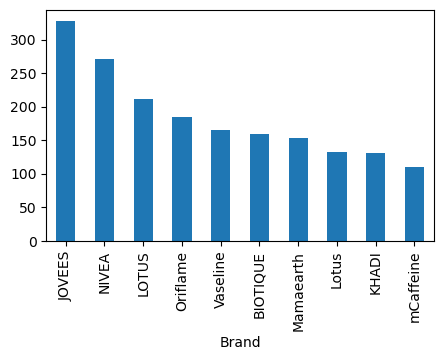

In [41]:
# top 10 Brands by size
plt.figure(figsize=(5,3))
df['Brand'].value_counts()[:10].plot(kind='bar')
plt.show()

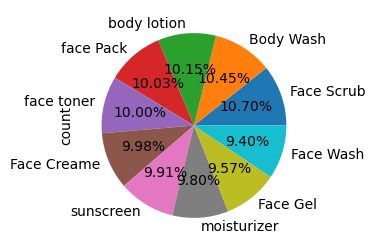

In [42]:
#Product Type
plt.figure(figsize=(5,3))
df['Product Type'].value_counts()[:10].plot(kind='pie',autopct="%.2f%%")
plt.show()

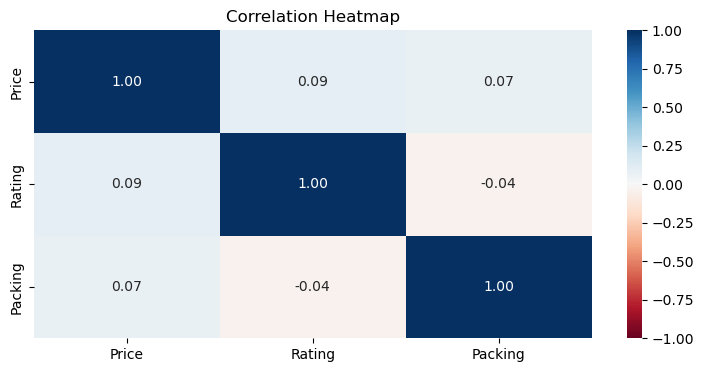

In [43]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(9,4))
sns.heatmap(df[numerical_columns].corr(),vmin=-1,vmax=1, annot=True, fmt=".2f", cmap='RdBu')
plt.title("Correlation Heatmap")
plt.show()

In [44]:
brand_summary = df.groupby('Brand').agg({'Rating': 'mean', 'Price': 'mean'}).reset_index()
brand_summary.columns = ['Brand', 'Average_Rating', 'Average_Price']

top_brands = brand_summary.sort_values(by=['Average_Rating', 'Average_Price'], ascending=[False, True]).head(10)


top_brands

,Brand,Average_Rating,Average_Price
2353,licuqure,5.0,89.000000
226,BBX Watermelon,5.0,119.000000
476,Dabas,5.0,129.000000
1728,SESUFZA,5.0,139.000000
1412,OUTSUP,5.0,161.000000
94,AYA Activated,5.0,175.000000
343,CMLIX,5.0,175.000000
1263,NATURE-Q,5.0,184.000000
1902,THE LOVE,5.0,189.666667
1320,Newsio,5.0,194.000000


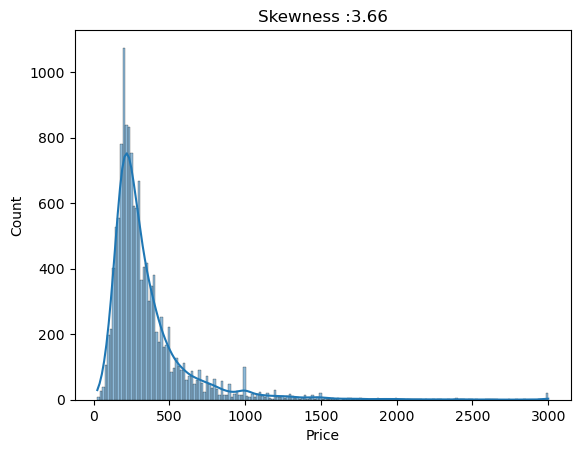

In [45]:
# Skewness and Distribution of Price
sns.histplot(df['Price'],kde='line')
plt.title(f"Skewness :{round(df['Price'].skew(),2)}")
plt.show()

In [46]:
#Minimun and Maximum Price

df['Price'].describe()

# Min = 24
# Max = 3000 ## As we capped the data to 3000

count    13752.000000
mean       357.098022
std        289.940810
min         24.000000
25%        199.000000
50%        271.000000
75%        399.000000
max       3000.000000
Name: Price, dtype: float64

In [47]:
df.drop(columns=['Packing'])

,Product,Price,Rating,Brand,Product Type,Product_new
0,BIOTIQUE Fruit Brightening |Brightens & Soften...,212,4.200000,BIOTIQUE,Face Wash,Fruit Brightening Brightens Soften Skin 100 s...
1,Mamaearth Rice With Rice Water & Niacinamide ...,339,4.300000,Mamaearth,Face Wash,Rice Rice Water Niacinamide Glass Skin Face Wash
2,HIMALAYA PURIFYING NEEM | PREVENTS PIMPLE | AN...,239,4.400000,HIMALAYA,Face Wash,PURIFYING NEEM PREVENTS PIMPLE ANTI BACTERIA...
3,The Derma Co Sali-Cinamide Anti-Acne with 2% S...,192,4.200000,The Derma,Face Wash,Co SaliCinamide AntiAcne 2 Salicylic Acid 2 N...
4,"MUUCHSTAC Ocean for Men, Anti Acne & Pimple, S...",349,4.100000,MUUCHSTAC,Face Wash,Ocean Men Anti Acne Pimple Skin Brightening S...
...,...,...,...,...,...,...
16736,velvetbean Sunscreen - SPF NATURAL SPF 30 PA+ ...,250,4.200000,velvetbean,Face Gel,Sunscreen SPF NATURAL SPF 30 PA SUN BURN GEL
16737,LOTUS HERBALS WhiteGlow Vitamin-C Radiance Fac...,416,4.200000,LOTUS,Face Gel,HERBALS WhiteGlow VitaminC Radiance Facewash ...
16738,GREEN DERMA Alnalite-T Aloe Gel Tea tree Sooth...,114,4.000000,GREEN,Face Gel,DERMA AlnaliteT Aloe Gel Tea tree Soothing skin
16739,Gantavya Aloe Vera Gel For Anti-Tan Whitening ...,219,3.871429,Gantavya,Face Gel,Aloe Vera Gel AntiTan Whitening Skin


In [48]:
df.to_csv("skincare_preprocessed.csv",index=False)